# **Dependacies**

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import os
import random

# **Importing Training Data**

In [2]:
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']

## 파일을 불러오는데 경로를 체크해야함

In [10]:
import os
print(os.getcwd())

c:\dev\workspace\ai_sec\Asia_Arrived_La\SON


### 위 코드를 사용하면 c:\dev\workspace\ai_sec\Asia_Arrived_La\SON 본인은 이렇게 나옴 각자 자신의 폴더 위치에 따라 다르겠지만
 
### c:\dev\workspace\ai_sec\Asia_Arrived_La\ 해당 부분을 아래 기본 경로 정의에 적어주면 된다. 자기의 폴더 구조에 따라 다를 것이다.

In [22]:
Base_Path = r'c:\dev\workspace\ai_sec\Asia_Arrived_La' ## --------> 해당 부분임

In [8]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path  ## --------> 해당 부분임

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'train', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'train', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)

# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)

traindata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    traindata.append(image) 

이미지 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\train\images
라벨 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\train\labels


In [9]:
trainlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    trainlabel.append(a)

In [11]:
data = []
for i in range(0,len(trainlabel)):
    traindata[i] = traindata[i]/255
    data.append((traindata[i], trainlabel[i]))

random.shuffle(data)
images, labels =  [], []
for a, b in data:
    images.append(a)
    labels.append(b)
    


# **Visualize the Data**

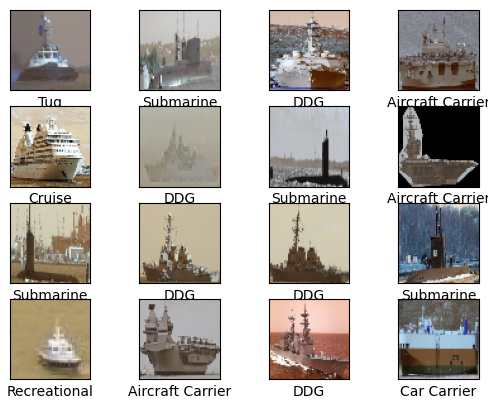

In [12]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel(ClassNames[labels[i]])
plt.show()

# **Importing Validation Data**

In [13]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'valid', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'valid', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)

# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)


validdata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    validdata.append(image)
    
validlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    validlabel.append(a)
    
validation = []
for i in range(0,len(validlabel)):
    validdata[i] = validdata[i]/255
    validation.append((validdata[i], validlabel[i]))

random.shuffle(validation)
validationimages, validationlabels =  [], []
for a, b in validation:
    validationimages.append(a)
    validationlabels.append(b)

이미지 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\valid\images
라벨 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\valid\labels


In [14]:
images = np.array(images)
labels = np.array(labels)
validationimages = np.array(validationimages)
validationlabels = np.array(validationlabels)

# **Model**

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Training the Model**

#### epochs를 처음에는 5 추천
#### 이후 epochs를 15으로 추천

In [31]:
model.fit(images, labels, batch_size = 32, epochs = 5, validation_data = (validationimages, validationlabels))

loss, accuracy = model.evaluate(images, labels)


print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/5
232/232 [==============================] - 64s 256ms/step - loss: 1.2654 - accuracy: 0.5828 - val_loss: 0.8782 - val_accuracy: 0.7417
Epoch 2/5
232/232 [==============================] - 56s 241ms/step - loss: 0.5364 - accuracy: 0.8331 - val_loss: 0.5960 - val_accuracy: 0.8258
Epoch 3/5
232/232 [==============================] - 52s 226ms/step - loss: 0.3257 - accuracy: 0.9004 - val_loss: 0.5905 - val_accuracy: 0.8433
Epoch 4/5
232/232 [==============================] - 53s 231ms/step - loss: 0.1843 - accuracy: 0.9423 - val_loss: 0.5775 - val_accuracy: 0.8491
Epoch 5/5
232/232 [==============================] - 18s 77ms/step - loss: 0.0679 - accuracy: 0.9834
Loss: 0.06789523363113403
Accuracy: 0.9833918213844299


# **Exporing the Model**

In [32]:
model.save('ShipClassifierV1.h5')

# **Loading the model**

In [33]:
model = models.load_model('ShipClassifierV1.h5')

# **Importing testing Data**

In [34]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'test', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'test', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)

# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)


testdata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    testdata.append(image)
    
testlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    testlabel.append(a)
    
testing = []
for i in range(0,len(testlabel)):
    testdata[i] = testdata[i]/255
    testing.append((testdata[i], testlabel[i]))

random.shuffle(testing)
testingimages, testinglabels =  [], []
for a, b in testing:
    testingimages.append(a)
    testinglabels.append(b)
    
testinglabels = np.array(testinglabels)
testingimages = np.array(testingimages)

이미지 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\test\images
라벨 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\test\labels


# **Testing the model**

In [35]:
loss, accuracy = model.evaluate(testingimages,testinglabels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

12/12 [==============================] - 1s 63ms/step - loss: 0.7018 - accuracy: 0.8346
Loss: 0.7017968893051147
Accuracy: 0.834645688533783


1/1 [==============================] - 0s 34ms/step


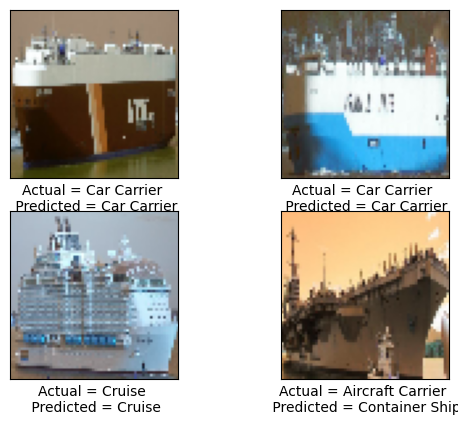

In [25]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testingimages[i],cmap=plt.cm.binary)
    pred = model.predict(np.array([testingimages[i]]))
    index = np.argmax(pred)
    plt.xlabel(f"Actual = {ClassNames[testinglabels[i]]} \n Predicted = {ClassNames[index]}")
    
plt.show()